In [27]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
#Import Seaborn for data visualization
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
import shap

/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimizat

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


In [2]:
file = 'df_DW_final.csv'

In [3]:
df= pd.read_csv(file)

In [4]:
df = df.drop(['Unnamed: 0','ID'], axis=1)

In [7]:
df.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,Complications
0,77.0,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,1.00,8.0,16.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.38,0.18,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,52.0,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.30,0.11,10.8,1.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,68.0,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.75,0.37,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,60.0,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.45,0.22,8.3,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


In [5]:
predictors = df.drop(['Complications'], axis=1)

In [6]:
target =  df['Complications']

In [7]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.30, random_state=40)

In [41]:
# Making a Scaler object
scaler = StandardScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
#The following code creates the Deep Learning Model
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

In [44]:
# Set up the model: model
model = Sequential()

2023-06-26 15:30:25.159499: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
# Add the first layer
model.add(Dense(40,activation='relu',input_shape = (n_cols,)))

In [47]:
# Add the output layer
model.add(Dense(1, activation = 'sigmoid'))


In [48]:
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
#Fit/Build the model
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
38/38 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4529
Epoch 2/20
38/38 [==============================] - 0s 992us/step - loss: 0.0000e+00 - accuracy: 0.3941
Epoch 3/20
38/38 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3832
Epoch 4/20
38/38 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3832
Epoch 5/20
38/38 [==============================] - 0s 976us/step - loss: 0.0000e+00 - accuracy: 0.3832
Epoch 6/20
38/38 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3832
Epoch 7/20
38/38 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3832
Epoch 8/20
38/38 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3832
Epoch 9/20
38/38 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3832
Epoch 10/20
38/38 [==============================] - 0s 1ms/step - loss: 0.000

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                4280      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________


In [51]:
y_pred= model.predict(X_test_scaled)

16/16 [==============================] - 0s 833us/step


In [52]:
y_pred

array([[0.0000000e+00],
       [1.8911230e-03],
       [8.8087777e-03],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.2409881e-02],
       [4.5662841e-06],
       [0.0000000e+00],
       [1.4573273e-04],
       [5.0910483e-03],
       [1.7940147e-02],
       [0.0000000e+00],
       [0.0000000e+00],
       [8.2013221e-04],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [3.8649209e-02],
       [0.0000000e+00],
       [3.1111045e-02],
       [0.0000000e+00],
       [9.9487491e-03],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.000000

In [55]:
#Round up predictions to nearest whole number
round_ypred= np.round(y_pred)

In [56]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, round_ypred)

# Print the confusion matrix
print(cm)

[[207   0]
 [303   0]]


In [23]:
print(round_ypred)

[[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.

In [61]:
print(classification_report(y_test, round_ypred))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58       207
           1       0.00      0.00      0.00       303

    accuracy                           0.41       510
   macro avg       0.20      0.50      0.29       510
weighted avg       0.16      0.41      0.23       510



/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

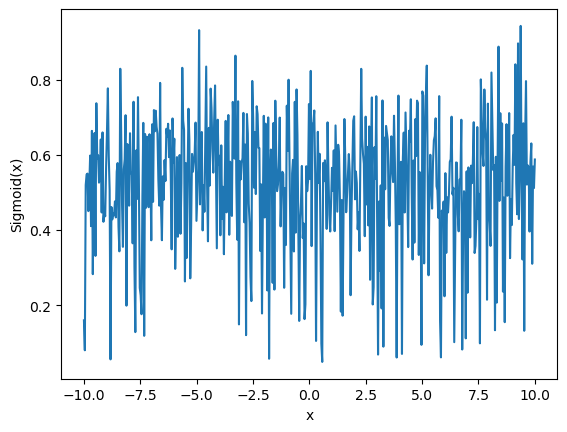

In [25]:
import matplotlib.pyplot as plt
# Assuming you have defined y_pred containing the predicted values or probabilities

x = np.linspace(-10, 10, y_pred.shape[0])
p = y_pred
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.plot(x, p)
plt.show()

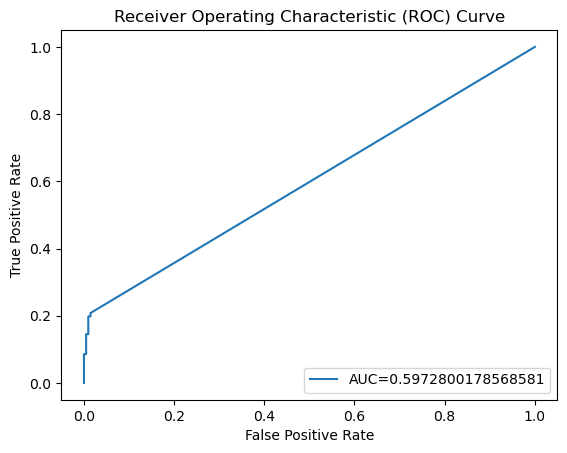

In [64]:
# Calculate the predicted probabilities for the positive class
y_pred_proba = y_pred.flatten()

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# Compute the AUC score
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [8]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [10]:
forest = RandomForestClassifier(random_state=42)

In [11]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [12]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [13]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [16]:
#Create model with Best values for Hyperparameters
forest = RandomForestClassifier(bootstrap= True,max_depth= 80,max_features=3,min_samples_leaf=3,min_samples_split= 8,
 n_estimators= 1000,random_state=42)

In [18]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000, random_state=42)

In [19]:
# Make predictions on the test data and evaluate the model
predictions = forest.predict(X_test)
accuracy = forest.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7098039215686275


In [25]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print(cm)

[[ 79 128]
 [ 20 283]]


<Axes: >

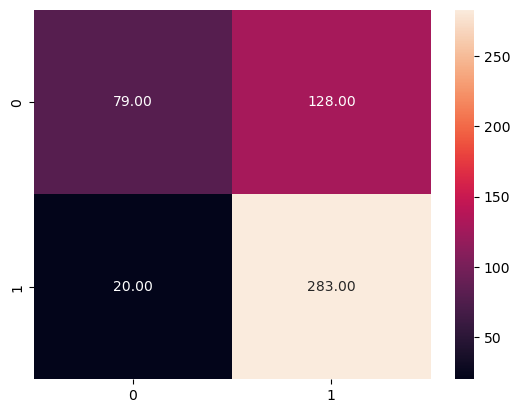

In [26]:
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt=".2F")

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.38      0.52       207
           1       0.69      0.93      0.79       303

    accuracy                           0.71       510
   macro avg       0.74      0.66      0.65       510
weighted avg       0.73      0.71      0.68       510



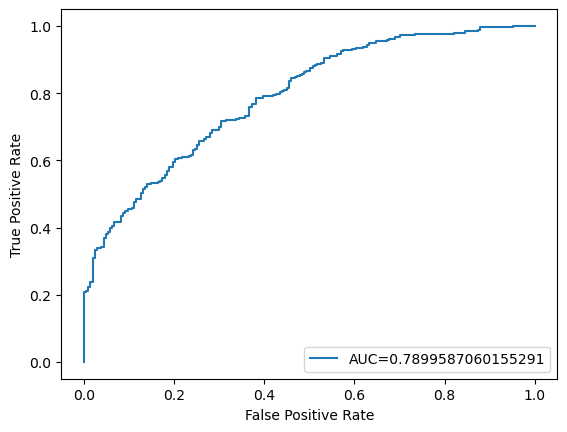

In [22]:
#define metrics
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

30


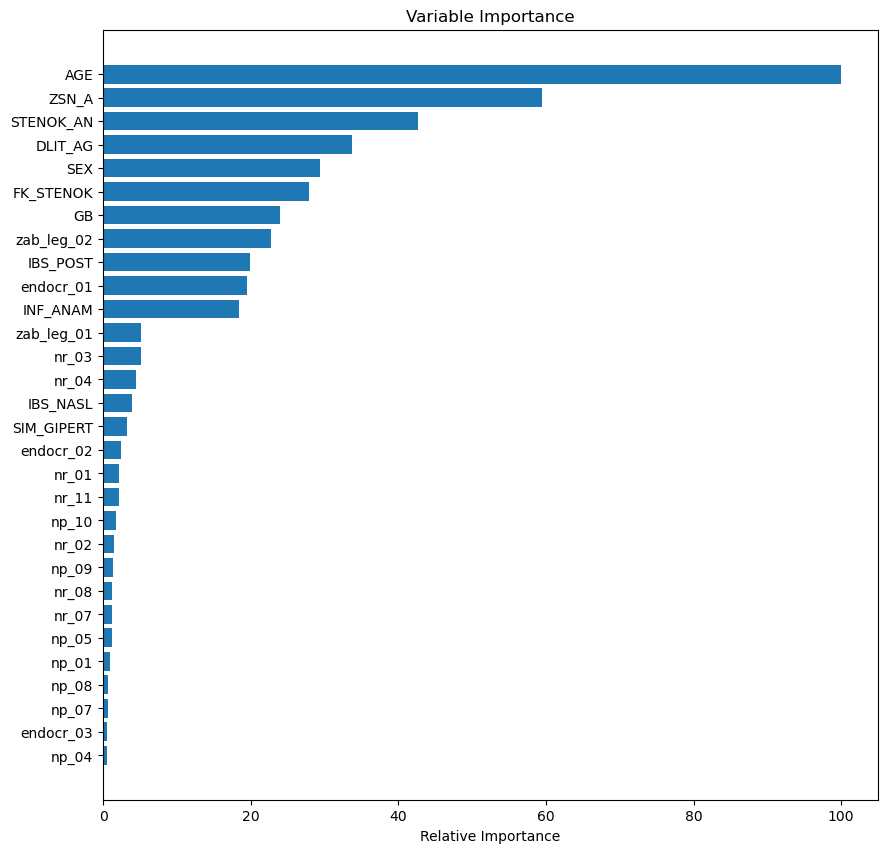

In [23]:
feature_importance = forest.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, predictors.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [24]:
# Calculate permutation importance
result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=0)

# Get feature importances
importances = result.importances_mean

# Print feature importances
for feature, importance in zip(predictors.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: AGE, Importance: 0.01764705882352945
Feature: SEX, Importance: 0.003921568627450999
Feature: INF_ANAM, Importance: 0.0009803921568627416
Feature: STENOK_AN, Importance: -0.00823529411764703
Feature: FK_STENOK, Importance: -0.00352941176470587
Feature: IBS_POST, Importance: -0.00117647058823529
Feature: IBS_NASL, Importance: 0.0007843137254901933
Feature: GB, Importance: 0.002352941176470591
Feature: SIM_GIPERT, Importance: -0.00019607843137254833
Feature: DLIT_AG, Importance: -0.0027450980392156763
Feature: ZSN_A, Importance: 0.018235294117647106
Feature: nr_11, Importance: -0.00019607843137254833
Feature: nr_01, Importance: -0.00019607843137254833
Feature: nr_02, Importance: 0.0
Feature: nr_03, Importance: 0.00039215686274509667
Feature: nr_04, Importance: 0.00019607843137254833
Feature: nr_07, Importance: 0.0
Feature: nr_08, Importance: 0.0
Feature: np_01, Importance: 0.0
Feature: np_04, Importance: -0.00019607843137254833
Feature: np_05, Importance: 0.00019607843137254833
F

In [28]:
#Here I use SHAP output to help delineate feature importance
explainer = shap.Explainer(forest)

In [30]:
shap_values = explainer.shap_values(predictors)

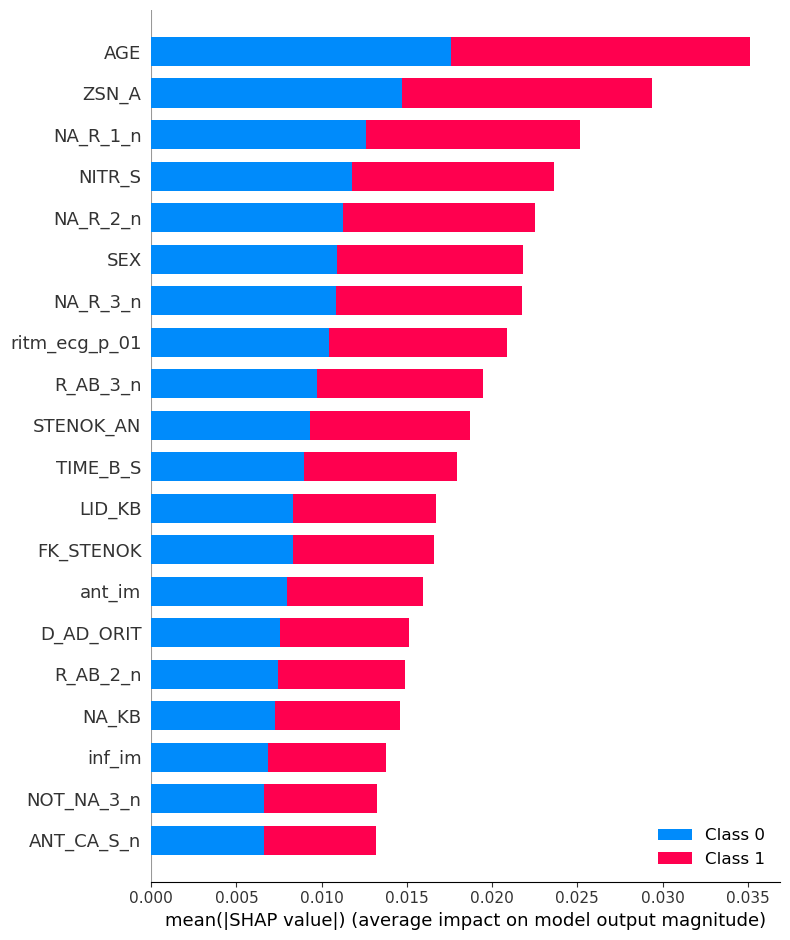

In [32]:
shap.summary_plot(shap_values, predictors)

In [33]:
#Logistic Regression

#Using a range of max iteration values of 100, 500 ,100, apply the Logistic Regression classifier to classify the the data.

#test_scores = []
train_scores = []
max_iter =  [100, 500, 1000]
for i in max_iter:

    logreg= LogisticRegression(random_state = 42, max_iter=i)
    logreg.fit(X_train_scaled, y_train)
    
    train_scores.append(logreg.score(X_train,y_train))
    #test_scores.append(logreg.score(X_test_scaled, y_test))

#Print the train and test scores for each iteration.
    #print('Test Scores:',test_scores)
    print('Train Scores:',train_scores)

Train Scores: [0.6168067226890757]
Train Scores: [0.6168067226890757, 0.6168067226890757]
Train Scores: [0.6168067226890757, 0.6168067226890757, 0.6168067226890757]


/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [34]:
#Identify the number of max_iter that resulted in the max score in the training dataset.
print('Max Train score Value:',max(train_scores))

Max Train score Value: 0.6168067226890757


In [35]:
#Identify the number of max_iter that resulted in the max score in the testing dataset.

max_train = max(train_scores)
indext = train_scores.index(max_train)
print('Max iterations for train =',max_iter[indext])

Max iterations for train = 100


In [36]:
logreg= LogisticRegression(random_state = 42, max_iter=max_iter[indext])
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [37]:
# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

In [38]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[128  79]
 [ 64 239]]


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       207
           1       0.75      0.79      0.77       303

    accuracy                           0.72       510
   macro avg       0.71      0.70      0.71       510
weighted avg       0.72      0.72      0.72       510



<Axes: >

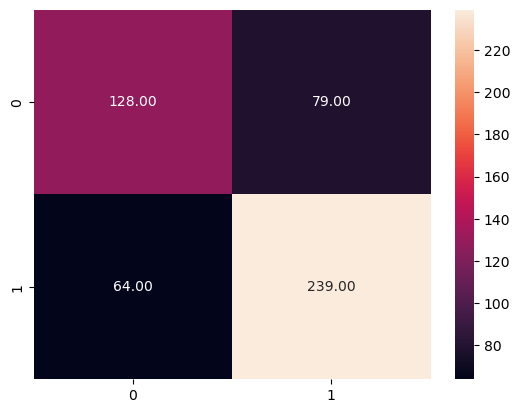

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt=".2F")

/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


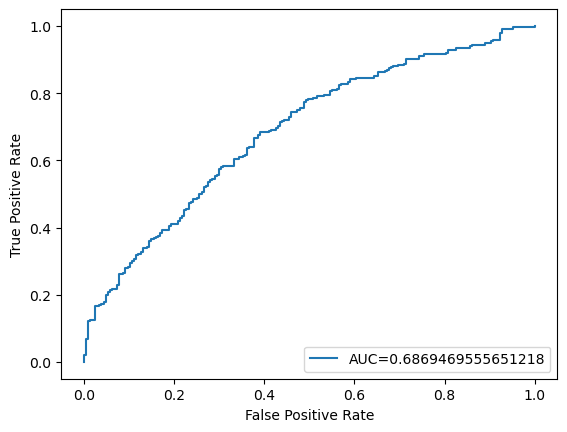

In [41]:
#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

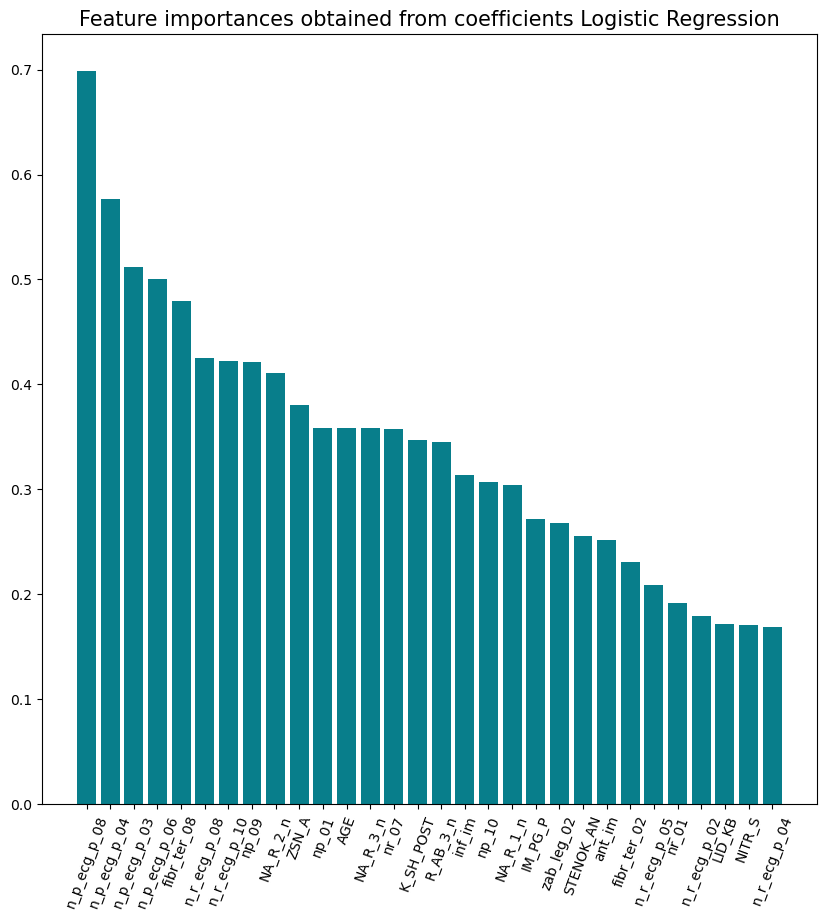

In [42]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False).head(30)
plt.figure(figsize=(10,10))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients Logistic Regression', size=15)
plt.xticks(rotation=70)
plt.show()

Top 12 Features Rank by Importance:
1. LBBB on admission
2. Type 1 Second-degree AV block on admission
3. First-degree AV block
4. Third-degree AV block
5. Fibrinolytic therapy by Streptodecase
6. Paroxysms of supraventricular tachycardia
7. Ventricular fibrillation on ECG
8. Use of opioid drugs in the ICU in the third day of the hospital period 
9. Ventricular fibrillation in PMH
10.Cardiogenic shock at the time of admission to intensive care unit 
11.Relapse of the pain in the third day of the hospital period
12.Presence of an inferior myocardial infarction 

In [15]:
#Here I create my last model with XGboost

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
best_learning_rate = None
best_estimator = None
best_score = 0.0

for learning_rate in learning_rates:
    for estimator in estimators:
        gb = GradientBoostingClassifier(n_estimators=estimator, learning_rate=learning_rate, max_depth=2, random_state=0)
        gb.fit(X_train, y_train)
        score = gb.score(X_train, y_train)
        
        if score > best_score:
            best_score = score
            best_learning_rate = learning_rate
            best_estimator = estimator

print("Best Learning Rate:", best_learning_rate)
print("Best Estimator:", best_estimator)


Best Learning Rate: 0.5
Best Estimator: 500


In [16]:
#Create model with optimized parameters:
gb = GradientBoostingClassifier(n_estimators=best_estimator, learning_rate = best_learning_rate, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=500, random_state=0)

In [33]:
y_pred = gb.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred, target_names=['NonExpired', 'Expired']))

              precision    recall  f1-score   support

  NonExpired       0.65      0.64      0.64       207
     Expired       0.76      0.77      0.76       303

    accuracy                           0.71       510
   macro avg       0.70      0.70      0.70       510
weighted avg       0.71      0.71      0.71       510



In [35]:
confusion_matrix(y_test, y_pred)

array([[132,  75],
       [ 71, 232]])

<Axes: >

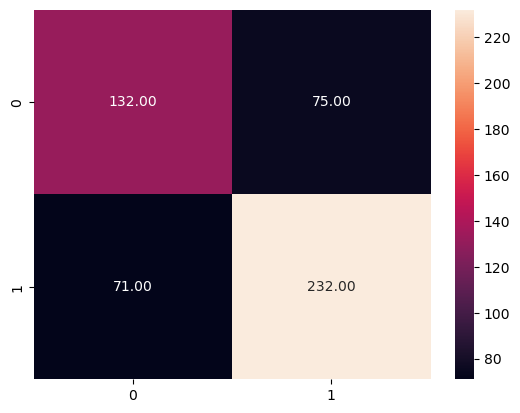

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt=".2F")

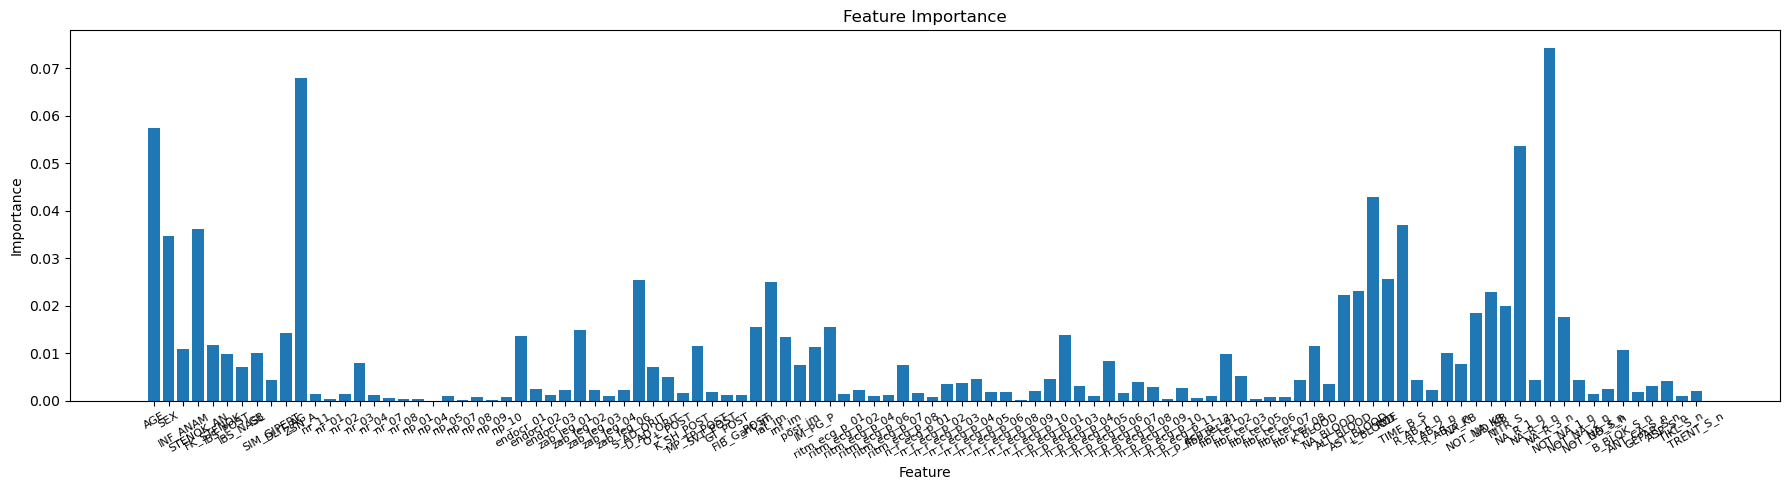

In [38]:

feature_importances = gb.feature_importances_
plt.figure(figsize=(18, 5))
# Plot feature importance
feature_names = predictors  
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), feature_names, rotation=30, fontsize=8)

plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [29]:
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance}")

AGE: 0.05747591641251342
SEX: 0.03464292970647624
INF_ANAM: 0.01084101603214802
STENOK_AN: 0.036248268739450966
FK_STENOK: 0.011790655010654781
IBS_POST: 0.009985492116380203
IBS_NASL: 0.007132825517891172
GB: 0.010094350140053809
SIM_GIPERT: 0.004333241400381148
DLIT_AG: 0.014338938776647592
ZSN_A: 0.06798545836370026
nr_11: 0.0014921956584937925
nr_01: 0.0004895827342075141
nr_02: 0.0014536773163193084
nr_03: 0.008081000381974082
nr_04: 0.0013474482373801759
nr_07: 0.000703382283850369
nr_08: 0.0003225815829223114
np_01: 0.0003490169650378724
np_04: 3.01333394033899e-05
np_05: 0.001049870628702275
np_07: 0.00014346855306550797
np_08: 0.0009238654904893793
np_09: 0.00016122612144133845
np_10: 0.000903079858561209
endocr_01: 0.013672508355822071
endocr_02: 0.002521449875072651
endocr_03: 0.0012185182563984977
zab_leg_01: 0.0023887391786505028
zab_leg_02: 0.01492235988414197
zab_leg_03: 0.002404754989617272
zab_leg_04: 0.0009688475992866222
zab_leg_06: 0.0023156192723418024
S_AD_ORIT: 0

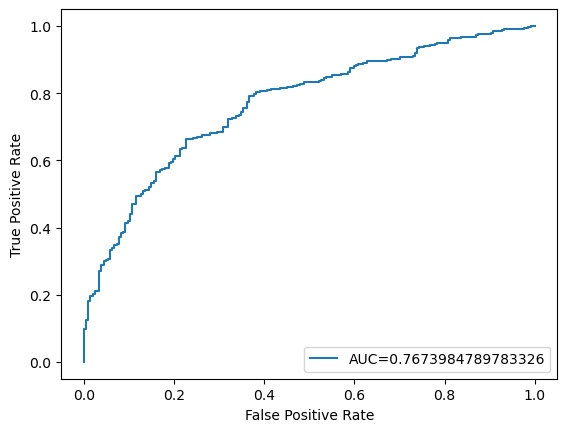

In [40]:
#define metrics
y_pred_proba = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Model Performance:
The best model was the Random Forest with an AUC of .789.  The second best model was XGboost with an AUC of .767.  The worst performing model was the deep learning model with an AUC of 0.597.  The AUC with logistic regression was .686.
I would recommend to proceed with the Random Forest model with the optimized parameters as stated above.